In [271]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

# Tabulation

In [2]:
!wget https://api.covid19india.org/states_daily.json

--2020-09-24 05:33:27--  https://api.covid19india.org/states_daily.json
Resolving api.covid19india.org (api.covid19india.org)... 185.199.110.153, 185.199.109.153, 185.199.108.153, ...
Connecting to api.covid19india.org (api.covid19india.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 372100 (363K) [application/json]
Saving to: ‘states_daily.json’

states_daily.json   100%[===================>] 363.38K  --.-KB/s    in 0.07s   

2020-09-24 05:33:27 (5.15 MB/s) - ‘states_daily.json’ saved [372100/372100]



In [7]:
import urllib.request

url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json');

In [8]:
covid_data = pd.read_json("data.json")
covid_data

states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
577  {'an': '10', 'ap': '10555', 'ar': '135', 'as':...
578  {'an': '0', 'ap': '51', 'ar': '1', 'as': '8', ...
579  {'an': '21', 'ap': '7228', 'ar': '289', 'as': ...
580  {'an': '15', 'ap': '8291', 'ar': '125', 'as': ...
581  {'an': '0', 'ap': '45', 'ar': '0', 'as': '11',...

[582 rows x 1 columns]

In [ ]:
# Load json as dictionary
import json

with open('data.json') as f:
  data = json.load(f)

data

In [10]:
data = data['states_daily']

In [11]:
covid_data = pd.json_normalize(data)
covid_data

an     ap   ar    as    br   ch  ...   tr     tt un    up    ut    wb
0     0      1    0     0     0    0  ...    0     81  0    12     0     0
1     0      0    0     0     0    0  ...    0      9  0     4     0     0
2     0      0    0     0     0    0  ...    0      2  0     0     0     0
3     0      0    0     0     0    0  ...    0     27  0     1     0     0
4     0      0    0     0     0    0  ...    0      4  0     0     0     0
..   ..    ...  ...   ...   ...  ...  ...  ...    ... ..   ...   ...   ...
577  10  10555  135  1817  1232  383  ...  419  89653  0  6589  1107  3047
578   0     51    1     8     3    4  ...    3   1085  0    77    11    62
579  21   7228  289  2098  1598  180  ...  504  86703  0  5143  1069  3189
580  15   8291  125  1762  1490  255  ...  603  87458  0  6506  1016  2998
581   0     45    0    11     1   10  ...    2   1123  0    87    17    61

[582 rows x 41 columns]

In [13]:
df = covid_data

In [14]:
df.date = pd.to_datetime(df.date)

In [16]:
df = df[df.status == 'Confirmed']

In [17]:
df.drop('status', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df.set_index('date', inplace=True)

In [19]:
df.head()

an ap ar as br ch ct dd dl dn ga  ... py rj sk tg tn tr  tt un  up ut wb
date                                         ...                                   
2020-03-14  0  1  0  0  0  0  0  0  7  0  0  ...  0  3  0  1  1  0  81  0  12  0  0
2020-03-15  0  0  0  0  0  0  0  0  0  0  0  ...  0  1  0  2  0  0  27  0   1  0  0
2020-03-16  0  0  0  0  0  0  0  0  0  0  0  ...  1  0  0  1  0  0  15  0   0  1  0
2020-03-17  0  0  0  0  0  0  0  0  1  0  0  ...  0  0  0  1  0  0  11  0   2  0  1
2020-03-18  0  0  0  0  0  0  0  0  2  0  0  ...  0  3  0  8  1  0  37  0   2  1  0

[5 rows x 39 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2020-03-14 to 2020-09-23
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   an      194 non-null    object
 1   ap      194 non-null    object
 2   ar      194 non-null    object
 3   as      194 non-null    object
 4   br      194 non-null    object
 5   ch      194 non-null    object
 6   ct      194 non-null    object
 7   dd      194 non-null    object
 8   dl      194 non-null    object
 9   dn      194 non-null    object
 10  ga      194 non-null    object
 11  gj      194 non-null    object
 12  hp      194 non-null    object
 13  hr      194 non-null    object
 14  jh      194 non-null    object
 15  jk      194 non-null    object
 16  ka      194 non-null    object
 17  kl      194 non-null    object
 18  la      194 non-null    object
 19  ld      194 non-null    object
 20  mh      194 non-null    object
 21  ml      194 non-null    object
 22  mn     

In [21]:
df.tn

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-09-19    5569
2020-09-20    5516
2020-09-21    5344
2020-09-22    5337
2020-09-23    5325
Name: tn, Length: 194, dtype: object

In [22]:
pd.to_numeric(df.tn)

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2020-09-19    5569
2020-09-20    5516
2020-09-21    5344
2020-09-22    5337
2020-09-23    5325
Name: tn, Length: 194, dtype: int64

In [23]:
df = df.apply(pd.to_numeric)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2020-03-14 to 2020-09-23
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   an      194 non-null    int64
 1   ap      194 non-null    int64
 2   ar      194 non-null    int64
 3   as      194 non-null    int64
 4   br      194 non-null    int64
 5   ch      194 non-null    int64
 6   ct      194 non-null    int64
 7   dd      194 non-null    int64
 8   dl      194 non-null    int64
 9   dn      194 non-null    int64
 10  ga      194 non-null    int64
 11  gj      194 non-null    int64
 12  hp      194 non-null    int64
 13  hr      194 non-null    int64
 14  jh      194 non-null    int64
 15  jk      194 non-null    int64
 16  ka      194 non-null    int64
 17  kl      194 non-null    int64
 18  la      194 non-null    int64
 19  ld      194 non-null    int64
 20  mh      194 non-null    int64
 21  ml      194 non-null    int64
 22  mn      194 non-null    int64
 

In [25]:
df.tail()

an    ap   ar    as    br   ch  ...   tr     tt  un    up    ut    wb
date                                        ...                                  
2020-09-19  13  8218  245  2595  1616  290  ...  535  92574   0  5729  2078  3188
2020-09-20   7  7738  135  1227  1555  286  ...  525  87395   0  5758   878  3177
2020-09-21  22  6235  210  2640  1314  216  ...  243  74493   0  4618   814  3165
2020-09-22  18  7553  249  2073  1609  248  ...  559  83361   0  5650   874  3182
2020-09-23  21  7228  289  2098  1598  180  ...  504  86703   0  5143  1069  3189

[5 rows x 39 columns]

# Styling tabulation

In [27]:
df = df.tail(7)

In [29]:
df.style

In [46]:
def colour_red_negative(x):
  color = 'red' if x == 0 else 'white'
  return 'color:' + color

In [47]:
df.style.applymap(colour_red_negative)          # applymap to map each cell

In [49]:
df.style.highlight_max(color='red')

In [50]:
df.drop(['dd', 'ld', 'un'], axis=1, inplace=True)

In [51]:
df.style.highlight_max(color='red').highlight_min(color='green')

In [52]:
df.drop(['tt'], axis=1, inplace=True)

In [55]:
def bold_max_value(x):
  is_max = (x == x.max())
  return ['font-weight: bold' if y else '' for y in is_max]

In [57]:
df.style.apply(bold_max_value).highlight_min(color='green')     # apply to for mapping some axis

In [58]:
df.style.apply(bold_max_value).highlight_min(color='green', axis=1)  

In [59]:
df.style.apply(bold_max_value).highlight_max(color='red', axis=1)  

In [60]:
df.style.background_gradient(cmap='Reds')

In [61]:
df.style.background_gradient(cmap='Reds', axis=1)      # along rows

In [62]:
df.style.background_gradient(cmap='Reds', subset=['mh', 'tn', 'dl'])

In [69]:
df.style.bar()

In [70]:
df.style.bar(subset=['mh', 'tn', 'dl'])

In [72]:
df[['mh', 'tn', 'dl']].style.bar()

In [73]:
df[['mh', 'tn', 'dl']].style.bar(subset=['mh'], color='red'). \
bar(subset=['tn'], color='orange'). \
bar(subset=['dl'], color='yellow')

# Distribution of data

## Distribution of single continous variable

### Histogram

In [74]:
x = np.random.normal(size=1000)

In [79]:
sns.set(color_codes=True)

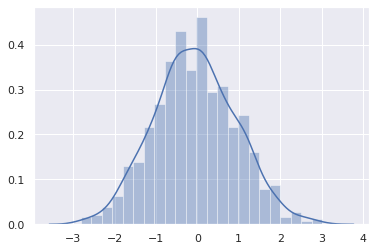

In [80]:
sns.distplot(x);

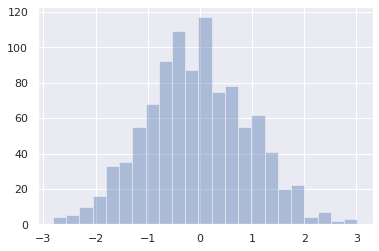

In [81]:
sns.distplot(x, kde=False);

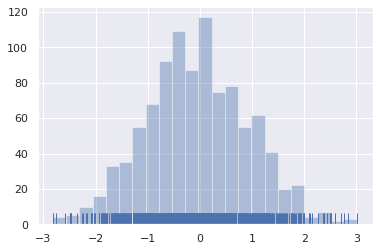

In [82]:
sns.distplot(x, kde=False, rug=True);

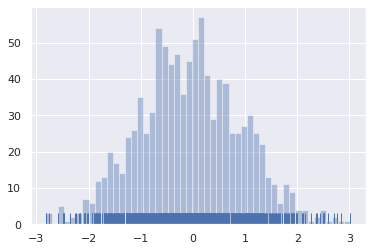

In [86]:
sns.distplot(x, kde=False, rug=True, bins=50);

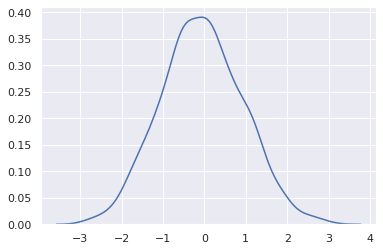

In [90]:
sns.kdeplot(x);

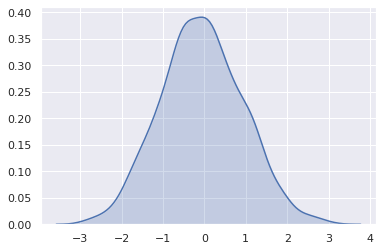

In [91]:
sns.kdeplot(x, shade=True);

In [92]:
y = np.random.uniform(size=1000)

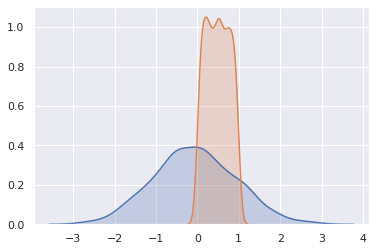

In [94]:
sns.kdeplot(x, shade=True);
sns.kdeplot(y, shade=True);

In [96]:
d = sns.load_dataset('diamonds')
d.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [97]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


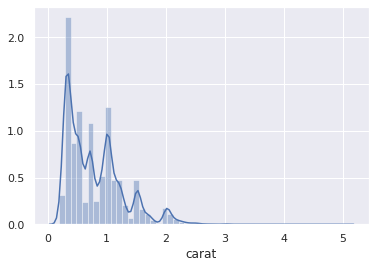

In [98]:
sns.distplot(d.carat);

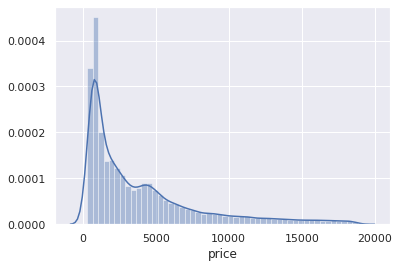

In [100]:
sns.distplot(d.price);

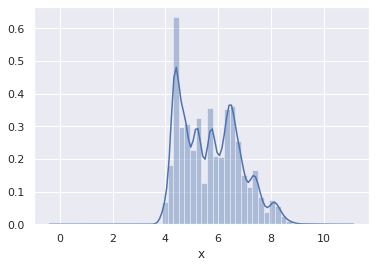

In [101]:
sns.distplot(d.x);

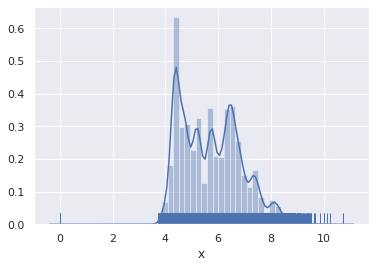

In [102]:
sns.distplot(d.x, rug=True);

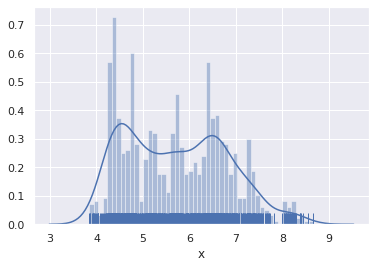

In [104]:
sns.distplot(d.sample(1000).x, rug=True, bins=50);

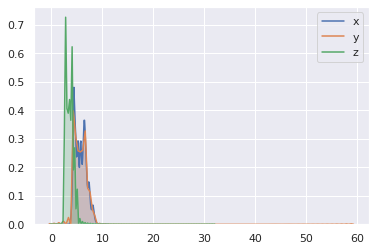

In [106]:
sns.kdeplot(d.x, shade=True);
sns.kdeplot(d.y, shade=True);
sns.kdeplot(d.z, shade=True);

### Boxplot

In [114]:
x = np.random.normal(size=1000)

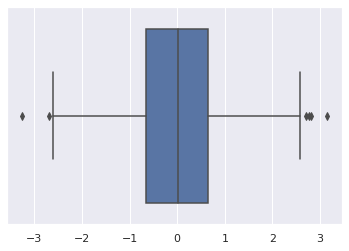

In [110]:
sns.boxplot(x);

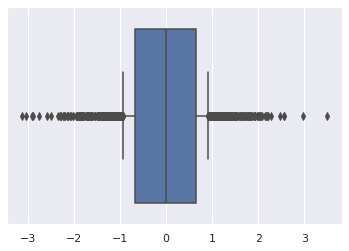

In [115]:
sns.boxplot(x, whis=0.2);

In [116]:
x = np.random.uniform(size=1000)

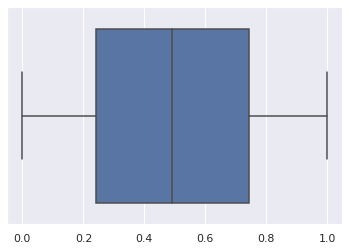

In [117]:
sns.boxplot(x);

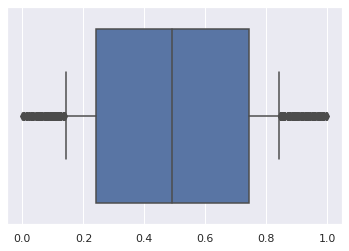

In [118]:
sns.boxplot(x, whis=0.2);

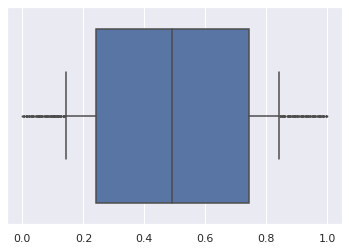

In [122]:
sns.boxplot(x, whis=0.2, fliersize=1);

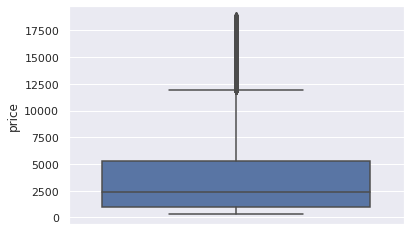

In [124]:
sns.boxplot(d.price, orient='v')

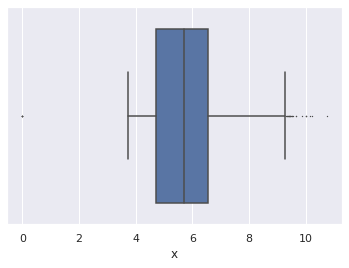

In [127]:
sns.boxplot(d.x, fliersize=0.5)

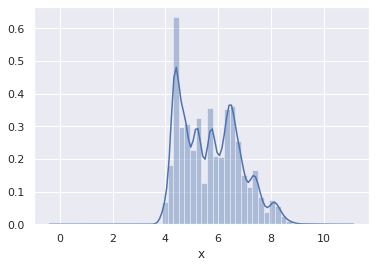

In [131]:
sns.distplot(d.x)

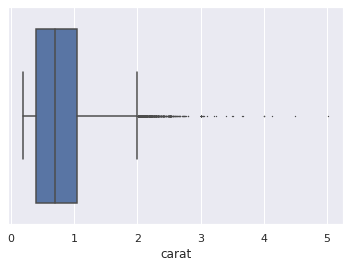

In [132]:
sns.boxplot(d.carat, fliersize=0.5);

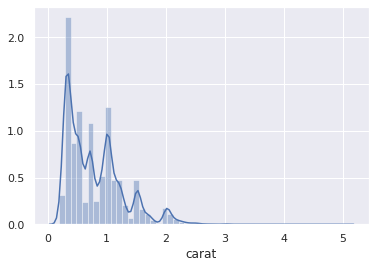

In [133]:
sns.distplot(d.carat);

### Boxen plot

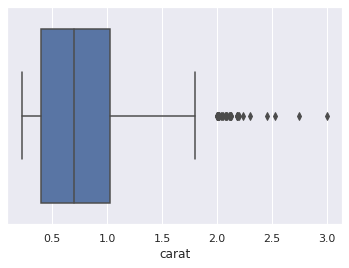

In [262]:
sns.boxplot(d.sample(1000).carat)

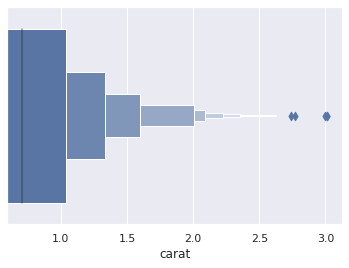

In [265]:
sns.boxenplot(d.sample(5000).carat);

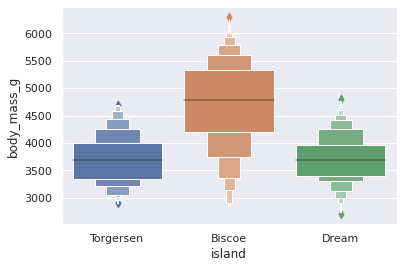

In [268]:
sns.boxenplot(x='island', y='body_mass_g', data=p);

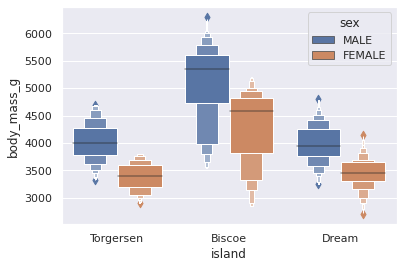

In [269]:
sns.boxenplot(x='island', y='body_mass_g', hue='sex', data=p);

## Distribution of categorical variable

### Bar plots

In [136]:
c = d.groupby('cut')['cut'].count()

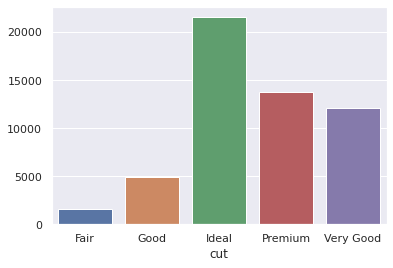

In [138]:
sns.barplot(x=c.index, y=c.values);

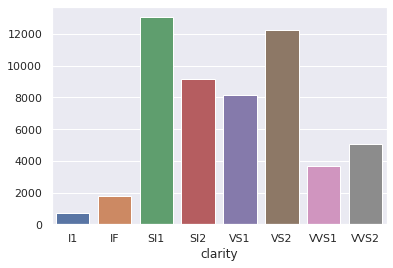

In [139]:
c = d.groupby('clarity')['clarity'].count()
sns.barplot(x=c.index, y=c.values);

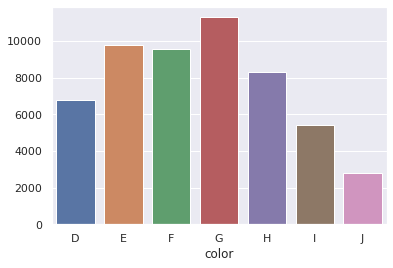

In [140]:
c = d.groupby('color')['color'].count()
sns.barplot(x=c.index, y=c.values);

## Joint distribution of two variables

### Jointplot

In [142]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

In [143]:
df = pd.DataFrame({'x':x, 'y':y})

In [145]:
sns.set(color_codes=True, style='darkgrid', )

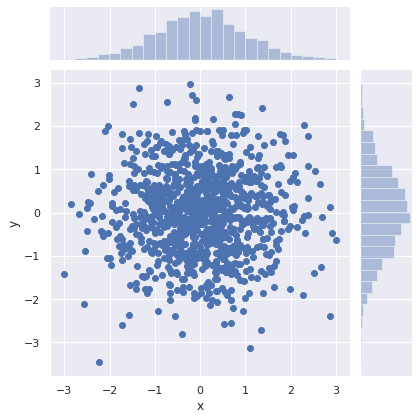

In [146]:
sns.jointplot('x', 'y', data=df);

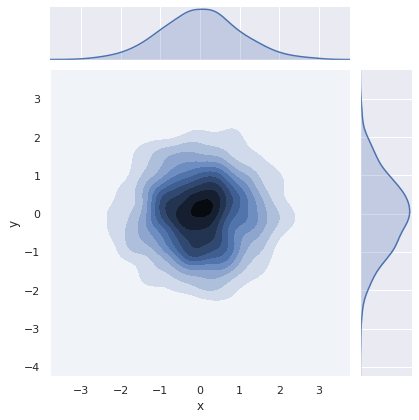

In [147]:
sns.jointplot('x', 'y', data=df, kind='kde');

In [149]:
x = np.random.normal(size=1000)
y = 3 * x + np.random.normal(size=1000)/5

df = pd.DataFrame({'x':x, 'y':y})

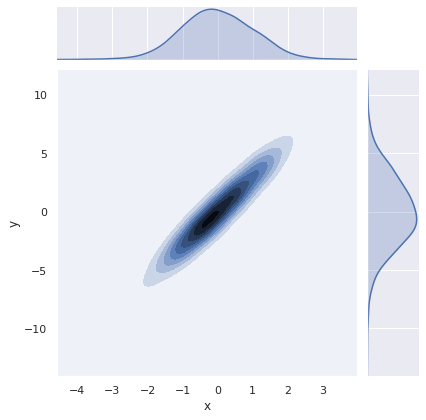

In [150]:
sns.jointplot('x', 'y', data=df, kind='kde');

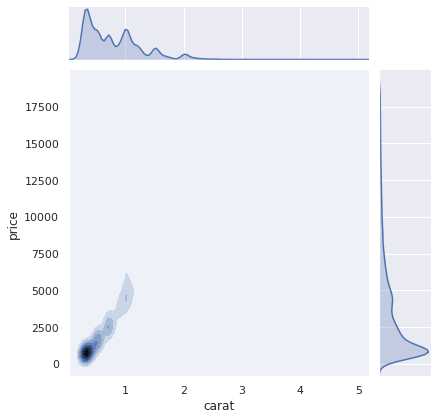

In [151]:
sns.jointplot('carat', 'price', data=d, kind='kde');

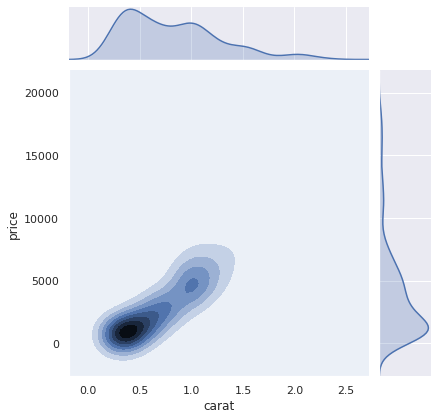

In [152]:
sns.jointplot('carat', 'price', data=d.sample(500), kind='kde');

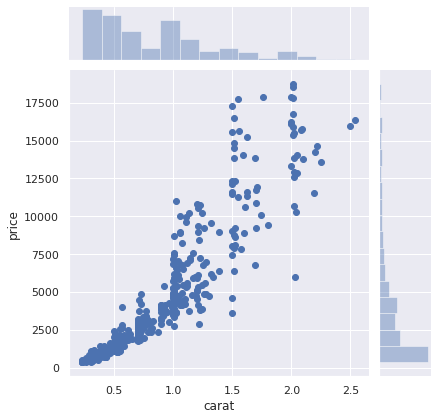

In [153]:
sns.jointplot('carat', 'price', data=d.sample(500));

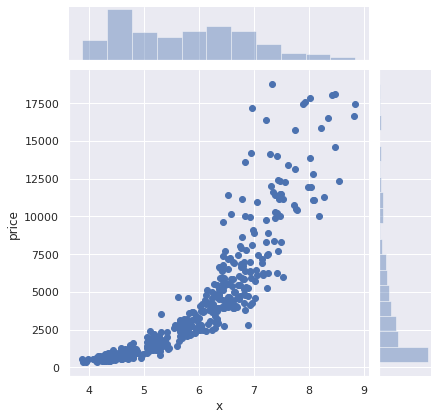

In [156]:
sns.jointplot('x', 'price', data=d.sample(500));

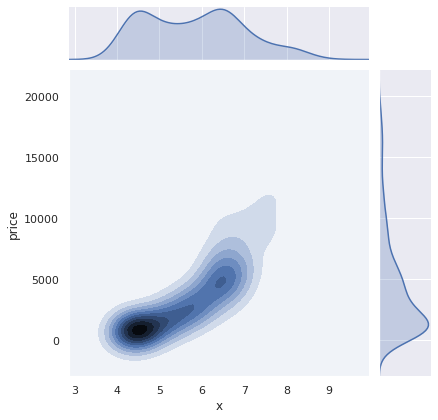

In [157]:
sns.jointplot('x', 'price', data=d.sample(500), kind='kde');

### Swarm plot

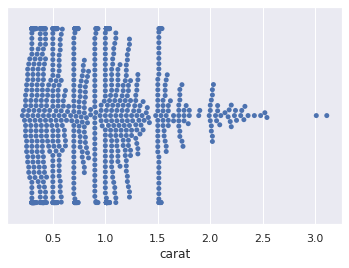

In [160]:
sns.swarmplot(d.sample(1000).carat);

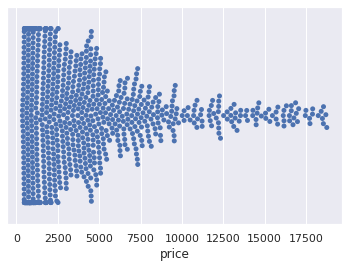

In [161]:
sns.swarmplot(d.sample(1000).price);

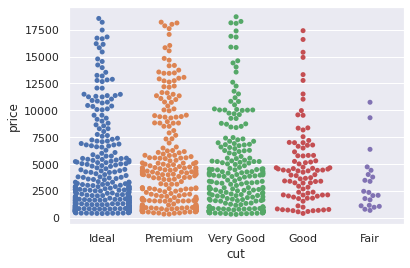

In [163]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

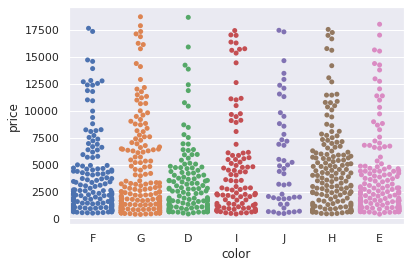

In [164]:
sns.swarmplot(x='color', y='price', data=d.sample(1000));

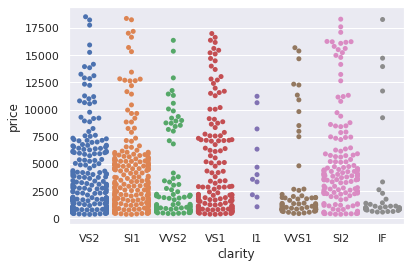

In [165]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

In [167]:
p = sns.load_dataset("penguins")
p.head()

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE

[5 rows x 7 columns]

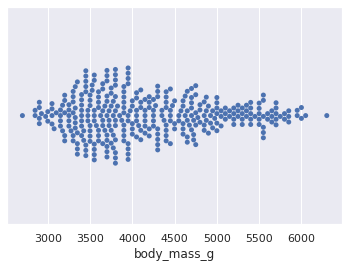

In [171]:
sns.swarmplot(x='body_mass_g', data=p);

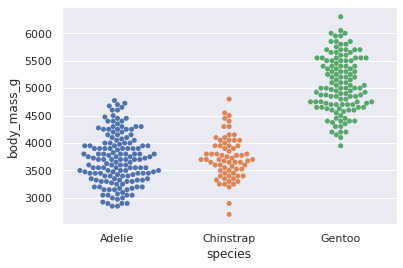

In [169]:
sns.swarmplot(x='species', y='body_mass_g', data=p);

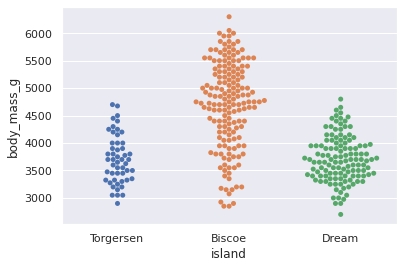

In [170]:
sns.swarmplot(x='island', y='body_mass_g', data=p);

### Violin plot

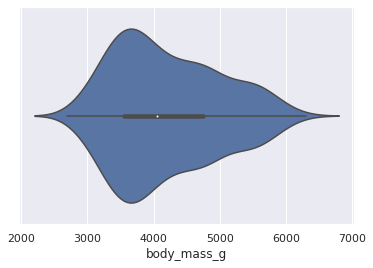

In [172]:
sns.violinplot(x='body_mass_g', data=p);

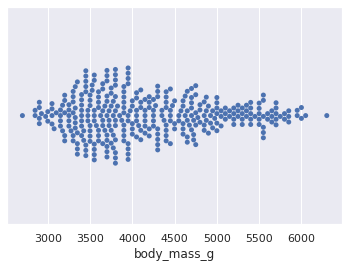

In [176]:
sns.swarmplot(x='body_mass_g', data=p);

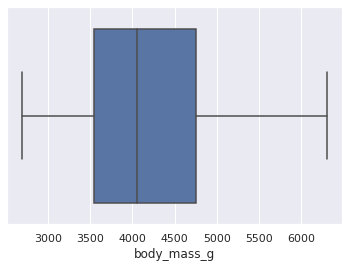

In [173]:
sns.boxplot(x='body_mass_g', data=p);

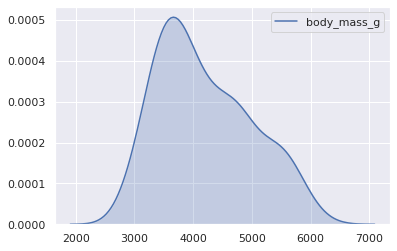

In [175]:
sns.kdeplot(p.body_mass_g, shade=True);

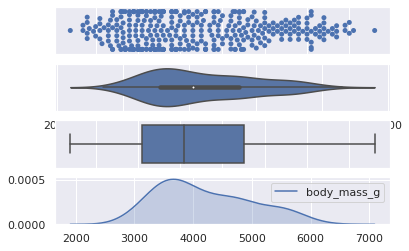

In [178]:
fig, axes = plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g', data=p, ax=axes[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axes[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axes[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axes[3]);

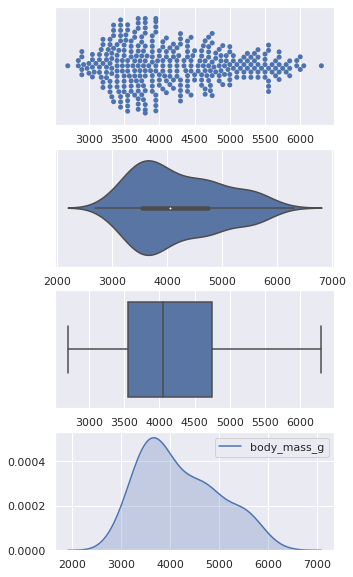

In [179]:
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(5, 10)
sns.swarmplot(x='body_mass_g', data=p, ax=axes[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axes[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axes[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axes[3]);

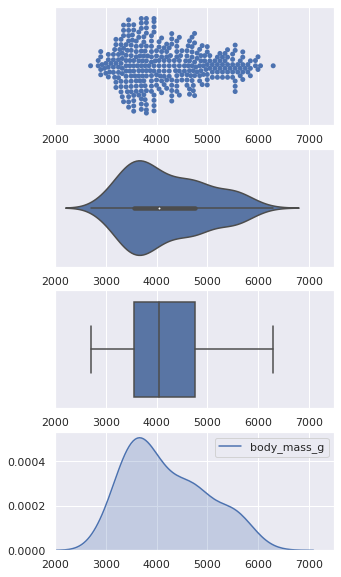

In [272]:
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(5, 10)
p1 = sns.swarmplot(x='body_mass_g', data=p, ax=axes[0]);
p1.set(xlim=(2000, 7500));
p2 = sns.violinplot(x='body_mass_g', data=p, ax=axes[1]);
p2.set(xlim=(2000, 7500));
p3 = sns.boxplot(x='body_mass_g', data=p, ax=axes[2]);
p3.set(xlim=(2000, 7500));
p4 = sns.kdeplot(p.body_mass_g, shade=True, ax=axes[3]);
p4.set(xlim=(2000, 7500));

### Multiple violin plots

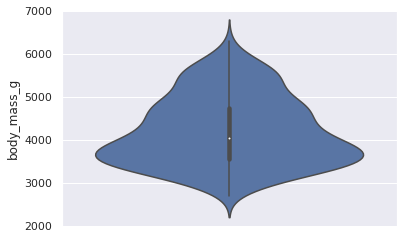

In [182]:
sns.violinplot(x='body_mass_g', data=p, orient='v');

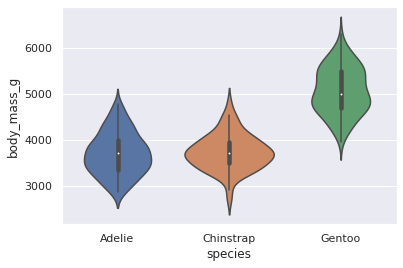

In [183]:
sns.violinplot(x='species', y='body_mass_g', data=p);

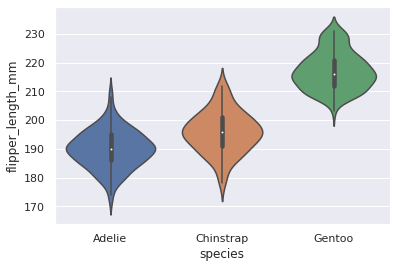

In [185]:
  sns.violinplot(x='species', y='flipper_length_mm', data=p);

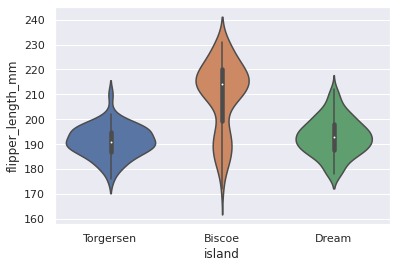

In [186]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

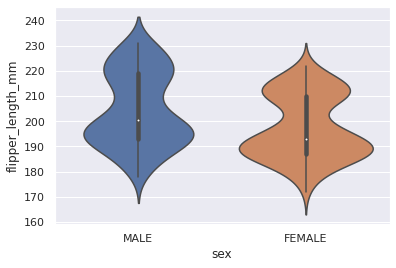

In [187]:
sns.violinplot(x='sex', y='flipper_length_mm', data=p);

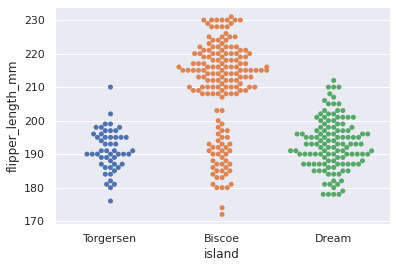

In [188]:
sns.swarmplot(x='island', y='flipper_length_mm', data=p);

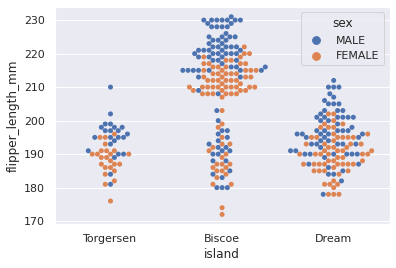

In [189]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=p);

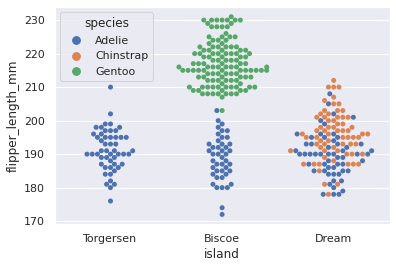

In [190]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='species', data=p);

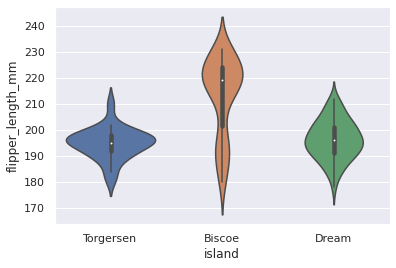

In [196]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='MALE']);

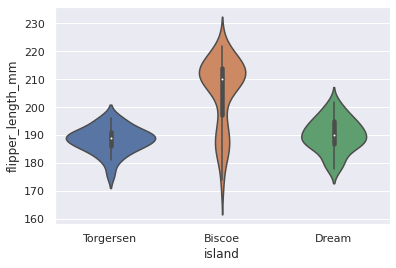

In [197]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='FEMALE']);

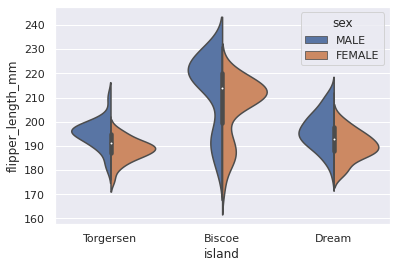

In [198]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', split=True, data=p);

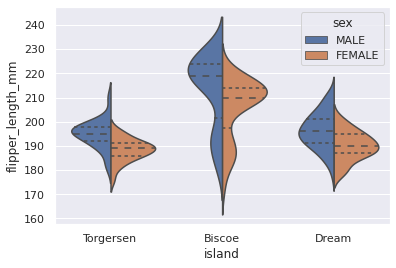

In [200]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', 
               split=True, inner='quartile', data=p);

In [201]:
sns.violinplot(x='island', y='flipper_length_mm', hue='species', 
               split=True, inner='quartile', data=p);

ValueError: ignored

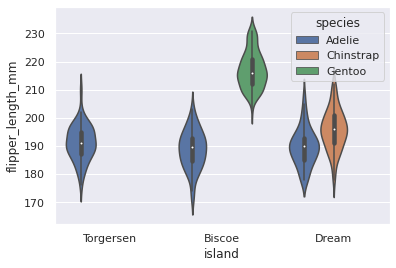

In [202]:
sns.violinplot(x='island', y='flipper_length_mm', hue='species', data=p);

In [210]:
p['binary_species'] = p.species.apply(lambda x:'Gentoo' if x == 'Gentoo' else 'Chinstrap|Adelie')

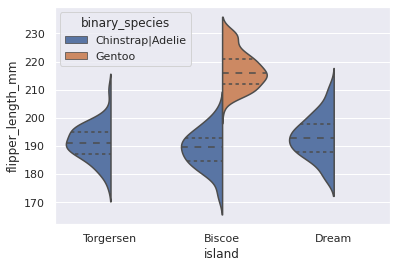

In [211]:
sns.violinplot(x='island', y='flipper_length_mm', hue='binary_species', 
               split=True, inner='quartile', data=p);

### Faceted plotting

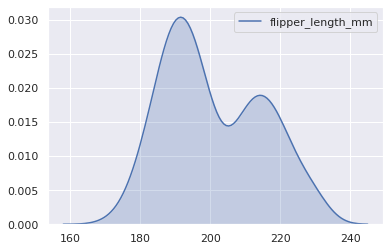

In [213]:
sns.kdeplot(p.flipper_length_mm, shade=True);

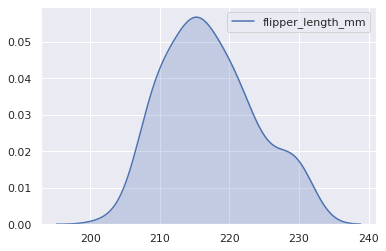

In [214]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);

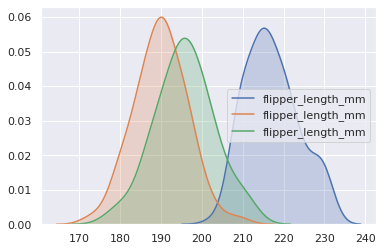

In [215]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);

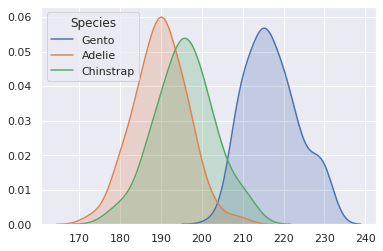

In [217]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);
plt.legend(title='Species', labels=['Gento', 'Adelie', 'Chinstrap']);

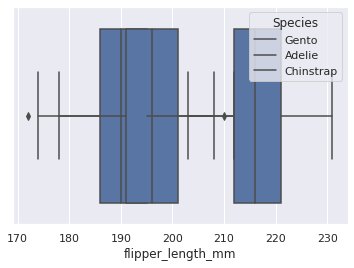

In [220]:
sns.boxplot(p[p.species == 'Gentoo'].flipper_length_mm);
sns.boxplot(p[p.species == 'Adelie'].flipper_length_mm);
sns.boxplot(p[p.species == 'Chinstrap'].flipper_length_mm);
plt.legend(title='Species', labels=['Gento', 'Adelie', 'Chinstrap']);

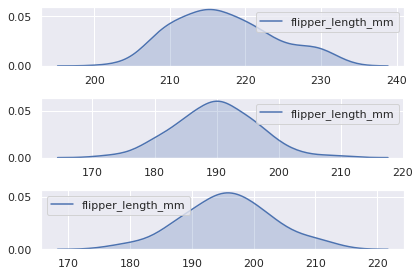

In [225]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
plt.tight_layout()
# plt.legend(title='Species', labels=['Gento', 'Adelie', 'Chinstrap']);

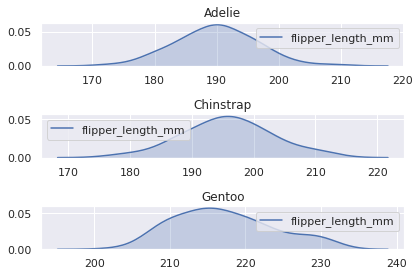

In [228]:
column_name = 'species'
nrows = len(p[column_name].unique())
fig, axs = plt.subplots(nrows=nrows);
i=0
for c_v in p[column_name].unique():
  p1 = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm, shade=True, ax=axs[i])
  p1.set_title(c_v)
  i += 1
plt.tight_layout()

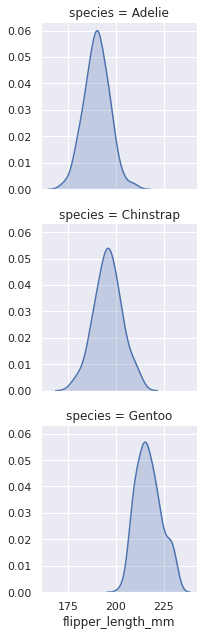

In [230]:
g = sns.FacetGrid(p, row='species')
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

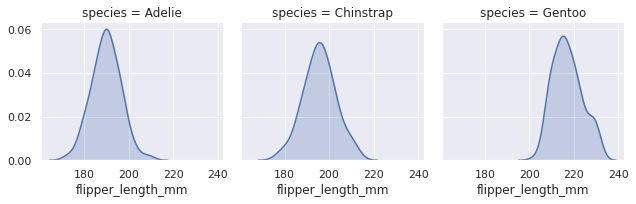

In [231]:
g = sns.FacetGrid(p, col='species')
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

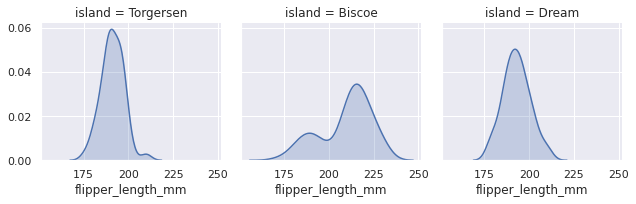

In [232]:
g = sns.FacetGrid(p, col='island')
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

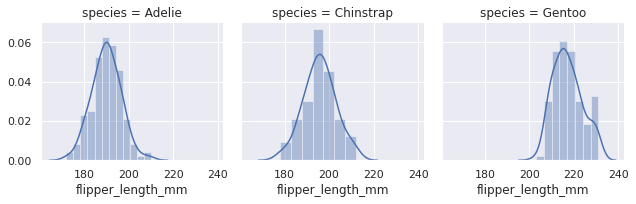

In [233]:
g = sns.FacetGrid(p, col='species')
g.map(sns.distplot, 'flipper_length_mm');

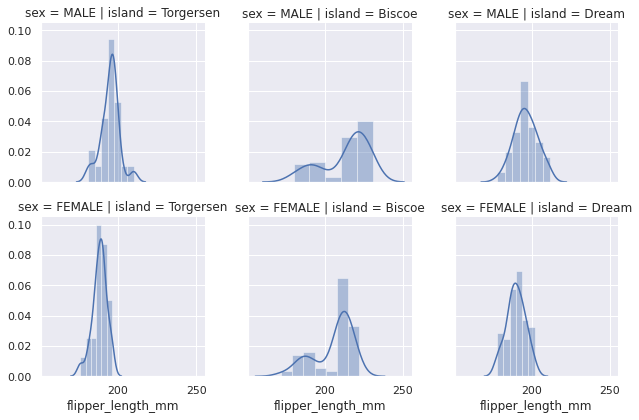

In [235]:
g = sns.FacetGrid(p, col='island', row='sex')
g.map(sns.distplot, 'flipper_length_mm');

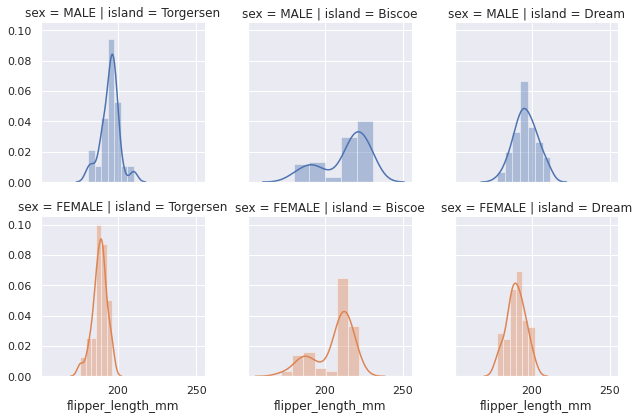

In [242]:
g = sns.FacetGrid(p, col='island', row='sex', hue='sex')
g.map(sns.distplot, 'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


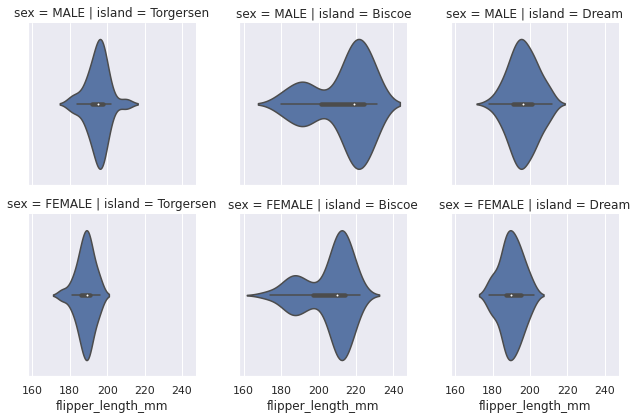

In [237]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.violinplot, 'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


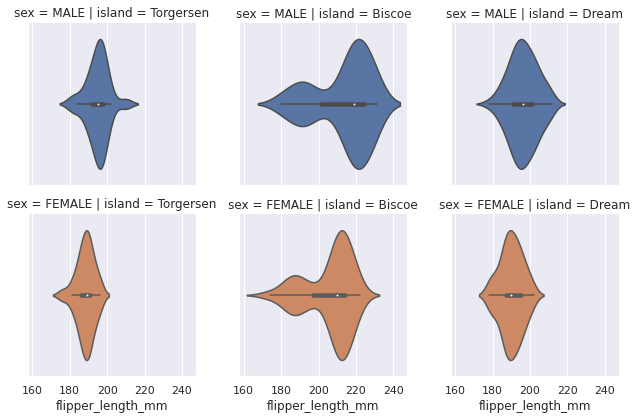

In [240]:
g = sns.FacetGrid(p, col='island', row='sex', hue='sex');
g.map(sns.violinplot, 'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


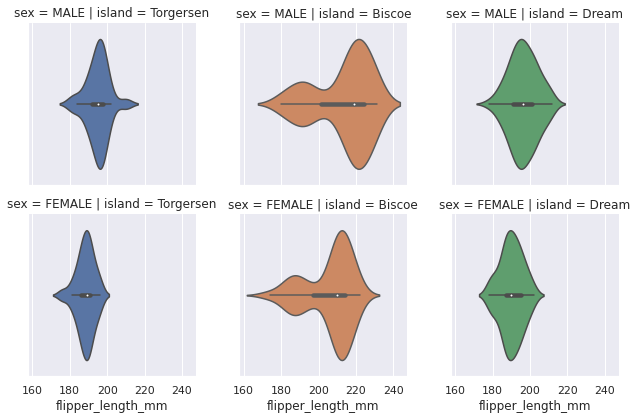

In [241]:
g = sns.FacetGrid(p, col='island', row='sex', hue='island');
g.map(sns.violinplot, 'flipper_length_mm');

### Pairplot

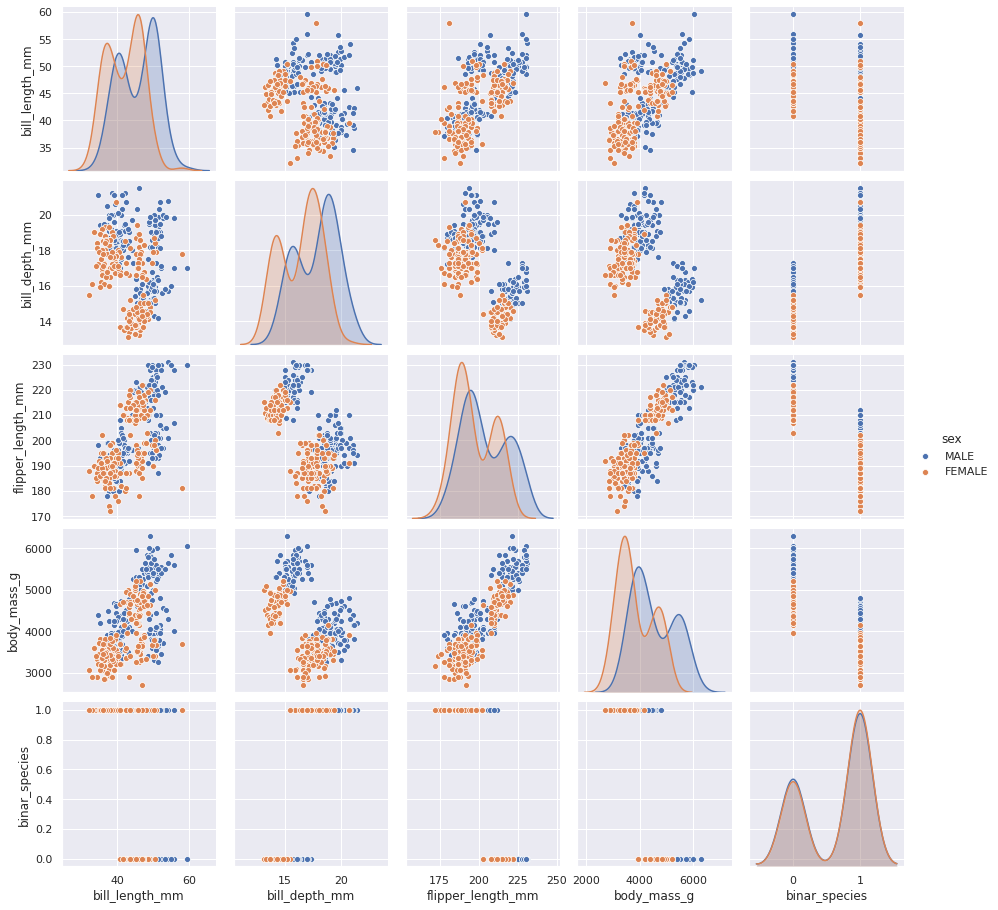

In [248]:
sns.pairplot(p, hue='sex');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


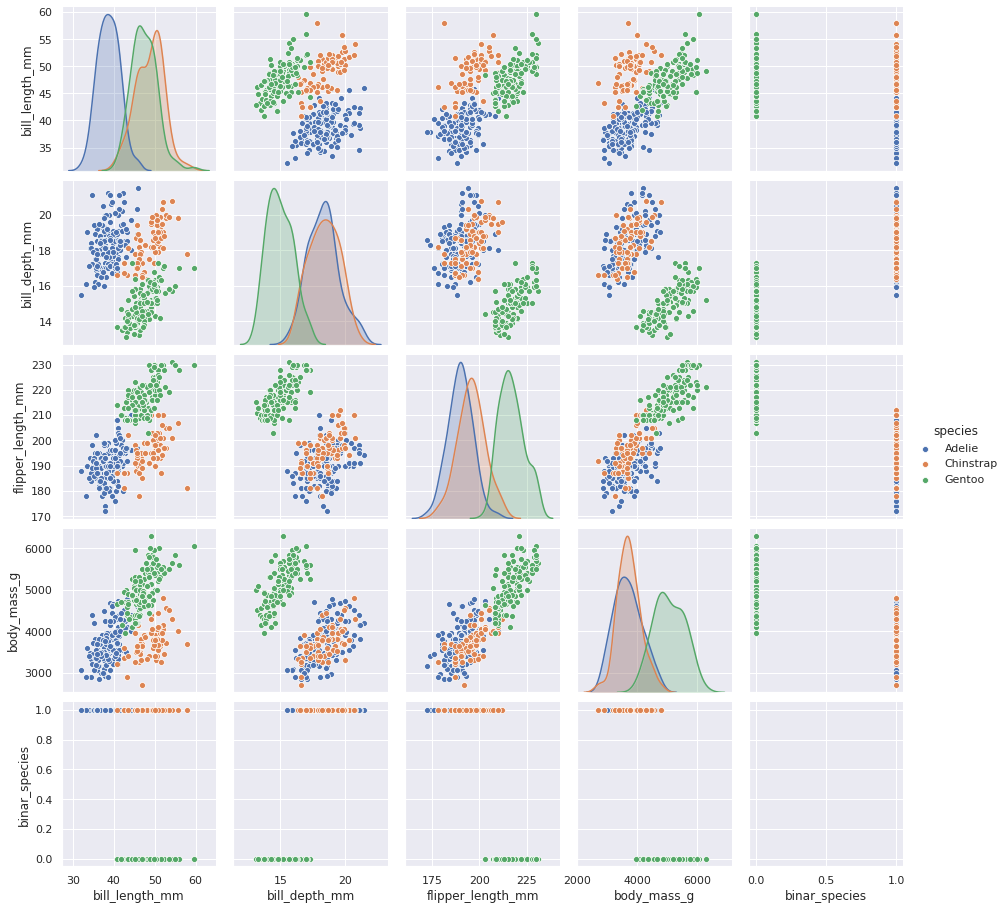

In [249]:
sns.pairplot(p, hue='species');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


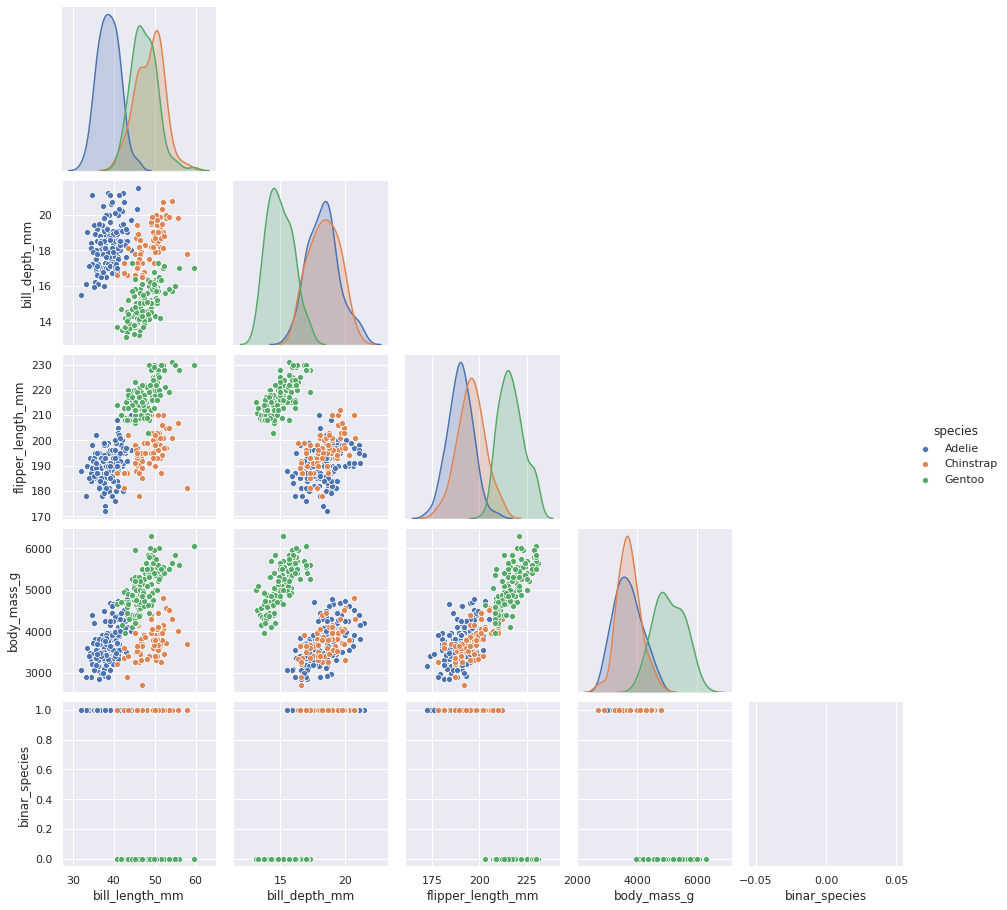

In [254]:
sns.pairplot(p, hue='species', corner=True);

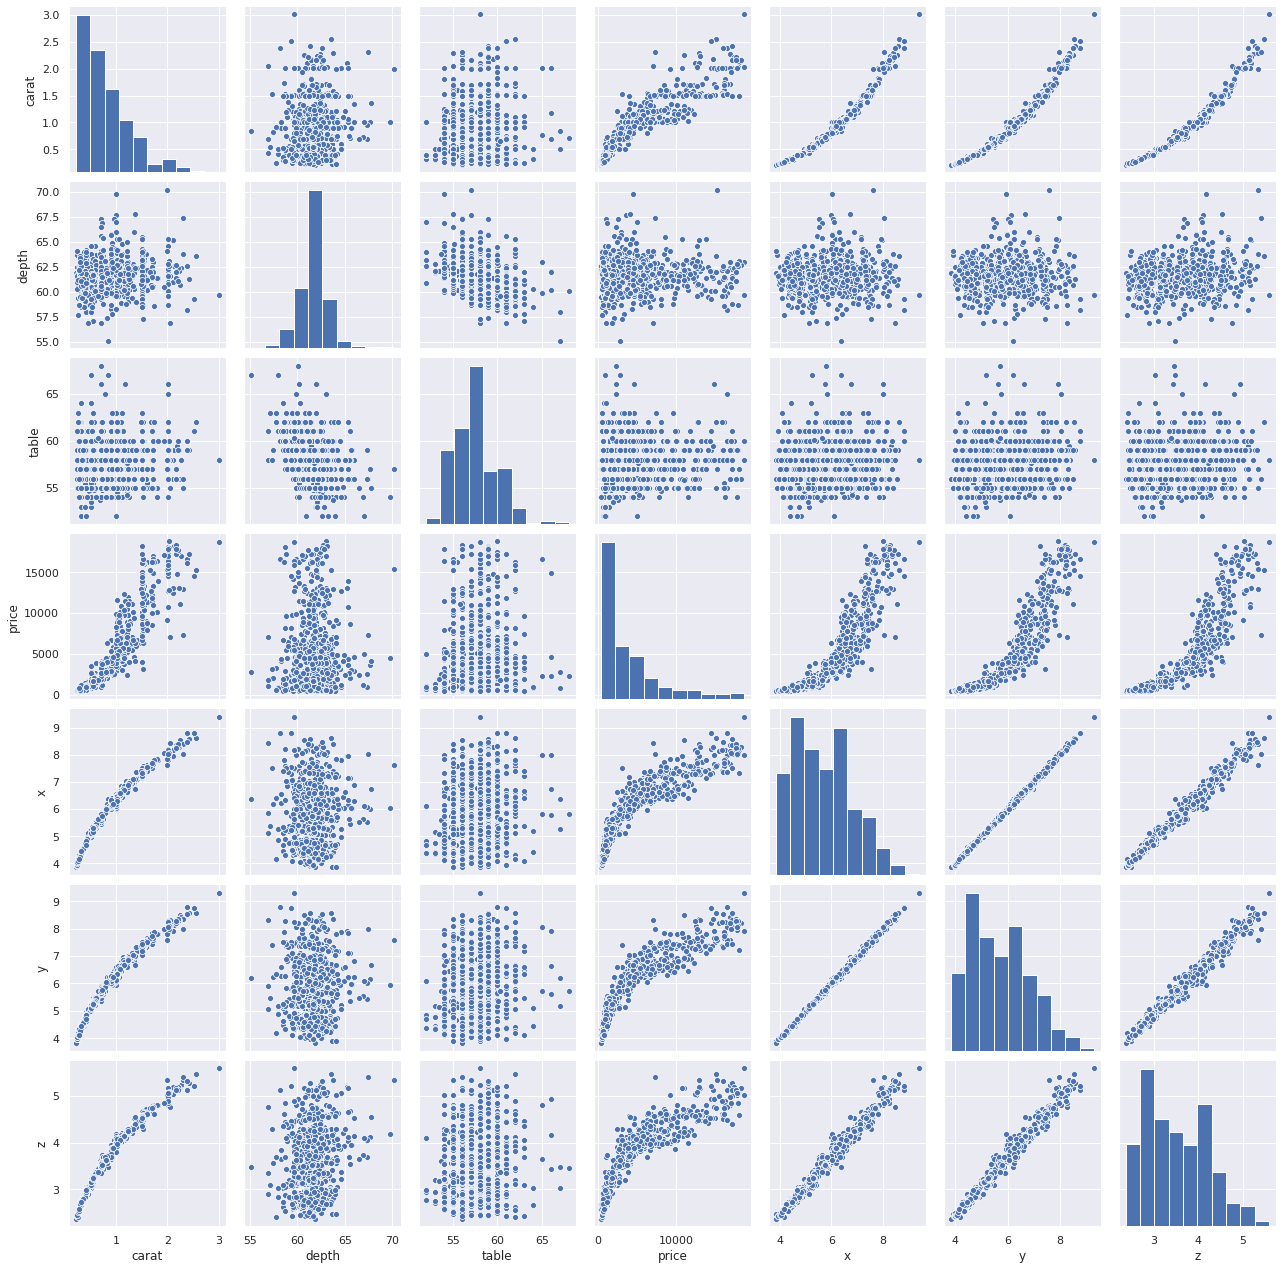

In [250]:
sns.pairplot(d.sample(1000));

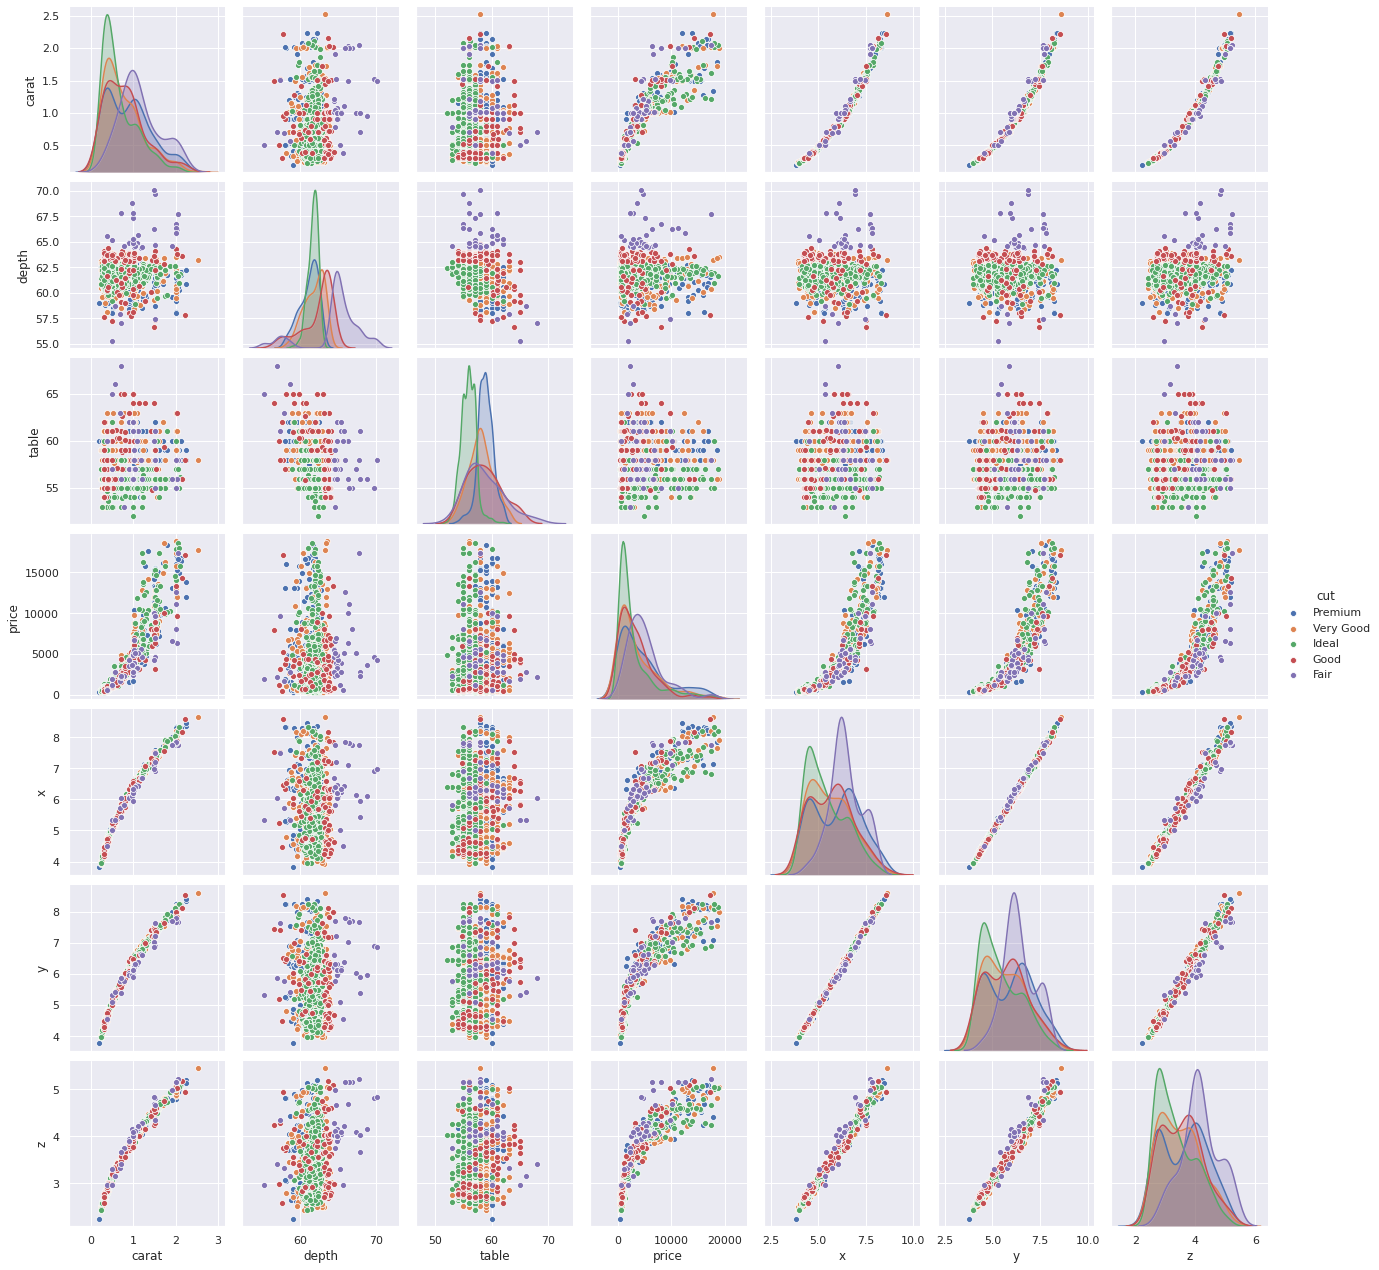

In [252]:
sns.pairplot(d.sample(1000), hue='cut');

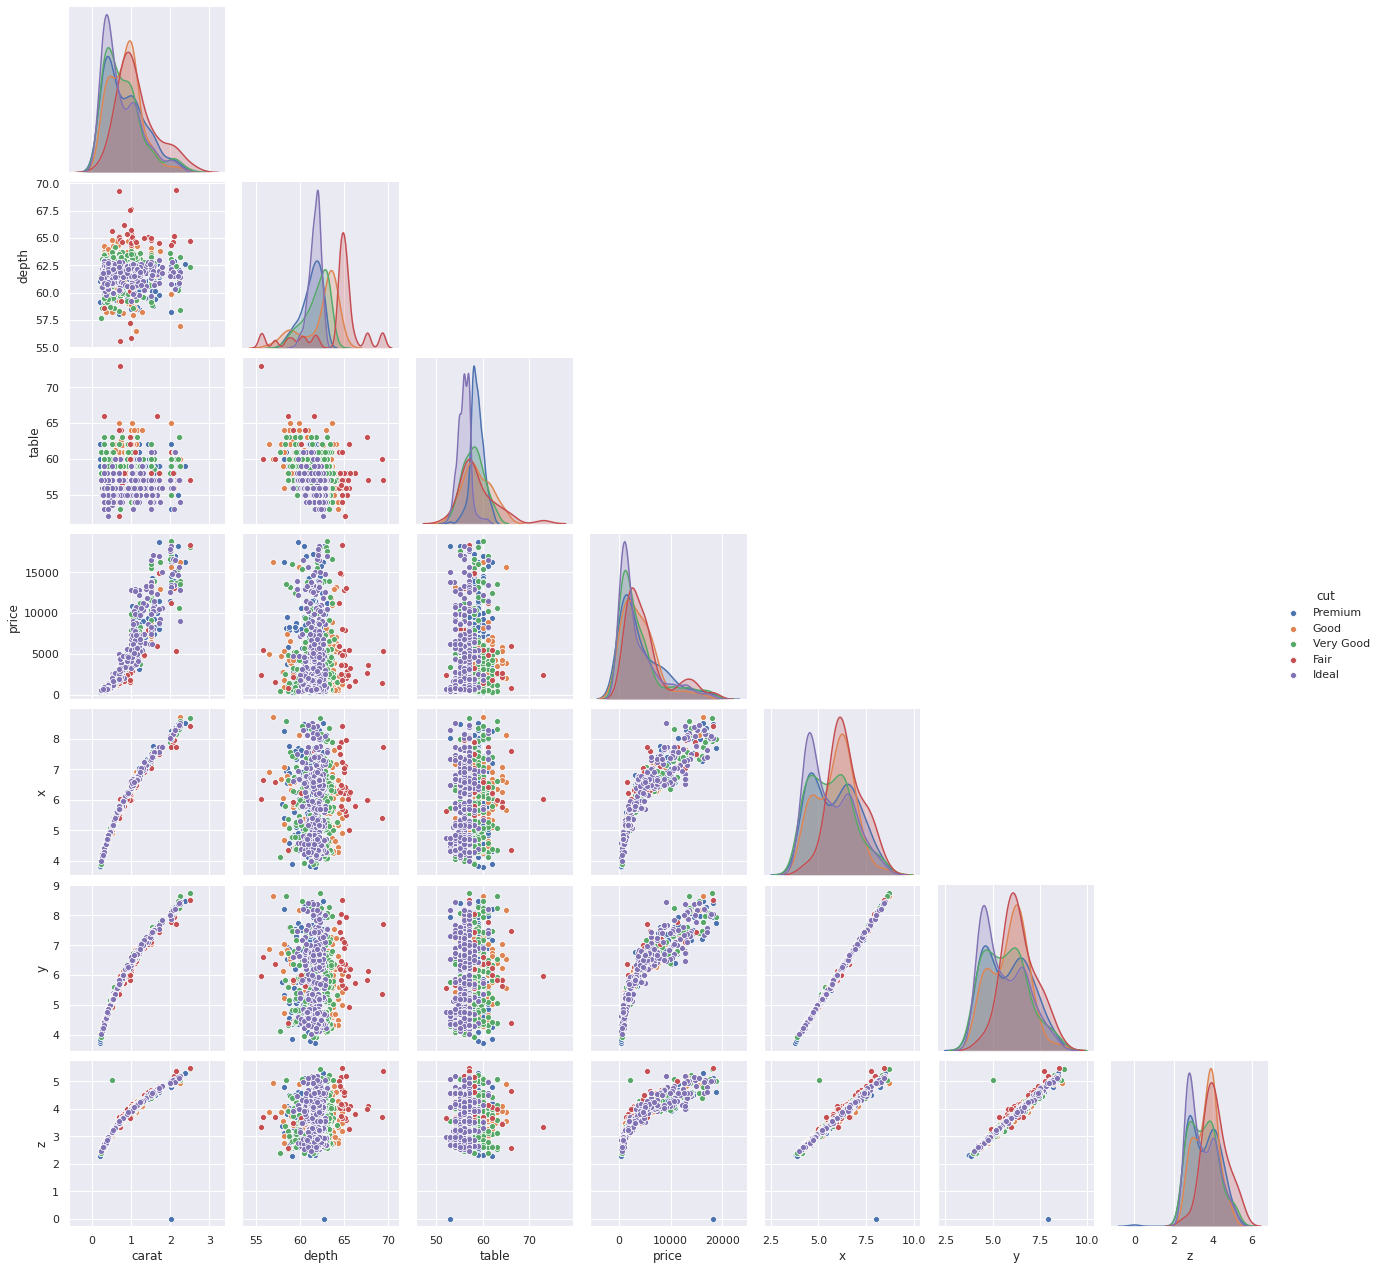

In [253]:
sns.pairplot(d.sample(1000), hue='cut', corner=True);